3.1.2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

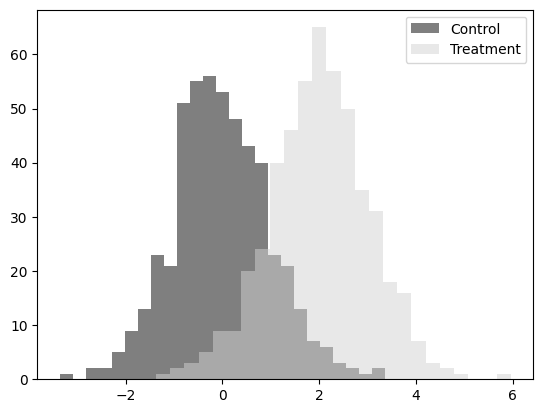

In [3]:
c = np.random.normal(0, 1, size=500)
t = np.random.normal(2, 1, size=500)

plt.hist(c, alpha=0.5, bins=25, color='black')
plt.hist(t, alpha=0.5, bins=25, color='lightgray')
plt.legend(["Control", "Treatment"])

3.2.1

Text(0, 0.5, '# of Rat Sightings')

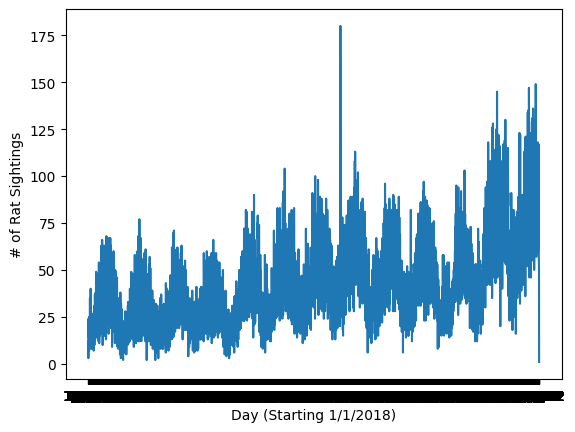

In [8]:
rats = pd.read_csv('../datasets/rat_sightings.csv', index_col=0)

plt.plot(rats["rat_sightings"])
plt.xlabel("Day (Starting 1/1/2018)")
plt.ylabel("# of Rat Sightings")

Text(0, 0.5, '# of Rat Sightings')

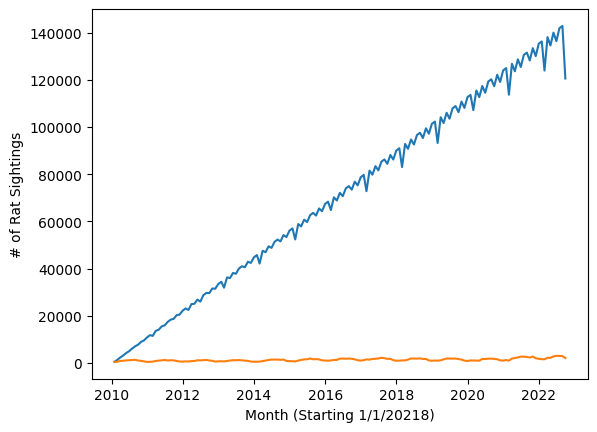

In [10]:
rats = rats.reset_index()
rats["day"] = pd.to_datetime(rats["day"], format="%m/%d/%y")

rats_group = rats.groupby(pd.Grouper(key="day", axis=0, freq="ME")).agg(["sum", "mean", "median"])

rats_group.columns = rats_group.columns.get_level_values(1)

plt.plot(rats_group["sum"])
plt.xlabel("Month (Starting 1/1/20218)")
plt.ylabel("# of Rat Sightings")

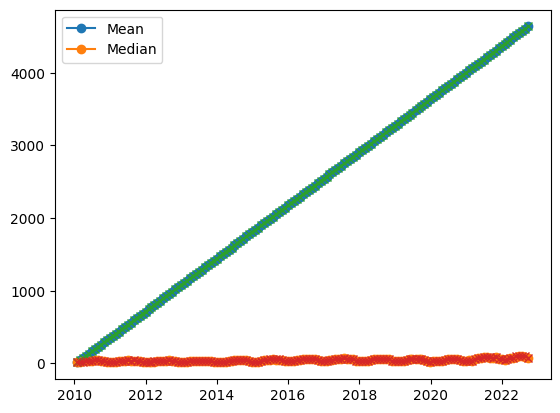

In [11]:
plt.plot(rats_group["mean"], marker="o")
plt.plot(rats_group["median"], marker="x")
plt.legend(["Mean", "Median"])

3.2.2

In [14]:
weather = pd.read_csv("../datasets/weather.csv", index_col=0)
weather = weather.reset_index()
weather["day"] = pd.to_datetime(weather["day"], format="%m/%d/%y")

rats_weather = pd.merge(weather, rats,how="left", on="day").fillna(0)

corrs = rats_weather.corr()
corrs.style.background_gradient(cmap="RdBu", vmin=-1)

,day,high_temp,low_temp,humidity,wind_speed,precip,level_0,index,rat_sightings
day,1.000000,0.111640,0.132842,-0.087376,-0.005591,-0.063734,1.000000,1.000000,-0.038617
high_temp,0.111640,1.000000,0.963170,0.165470,-0.219328,-0.035431,0.111640,0.111640,0.598620
low_temp,0.132842,0.963170,1.000000,0.188381,-0.249544,-0.025610,0.132842,0.132842,0.613970
humidity,-0.087376,0.165470,0.188381,1.000000,0.043593,0.232177,-0.087376,-0.087376,0.153656
wind_speed,-0.005591,-0.219328,-0.249544,0.043593,1.000000,0.212835,-0.005591,-0.005591,-0.240038
precip,-0.063734,-0.035431,-0.025610,0.232177,0.212835,1.000000,-0.063734,-0.063734,-0.029583
level_0,1.000000,0.111640,0.132842,-0.087376,-0.005591,-0.063734,1.000000,1.000000,-0.038617
index,1.000000,0.111640,0.132842,-0.087376,-0.005591,-0.063734,1.000000,1.000000,-0.038617
rat_sightings,-0.038617,0.598620,0.613970,0.153656,-0.240038,-0.029583,-0.038617,-0.038617,1.000000


Text(0, 0.5, 'Daily Rat Sightings')

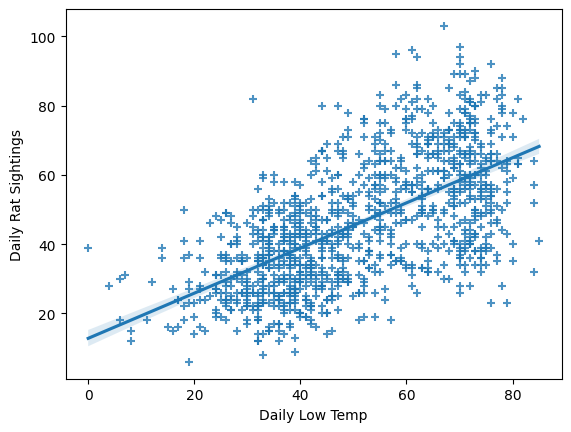

In [15]:
import seaborn as sns

sns.regplot(
    x = "low_temp",
    y = "rat_sightings",
    data=rats_weather,
    marker="+",
)
plt.xlabel("Daily Low Temp")
plt.ylabel("Daily Rat Sightings")